In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn import tree

In [4]:
X, y = load_boston(return_X_y=True)    #загрузили выборку данных
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train) #Попробуем обучить дерево без дополнительных параметров

DecisionTreeRegressor()

Модель переобучилась на обучающих данных

In [6]:
model.score(X_train, y_train)

1.0

In [7]:
model.score(X_test,y_test)

0.842413783072395

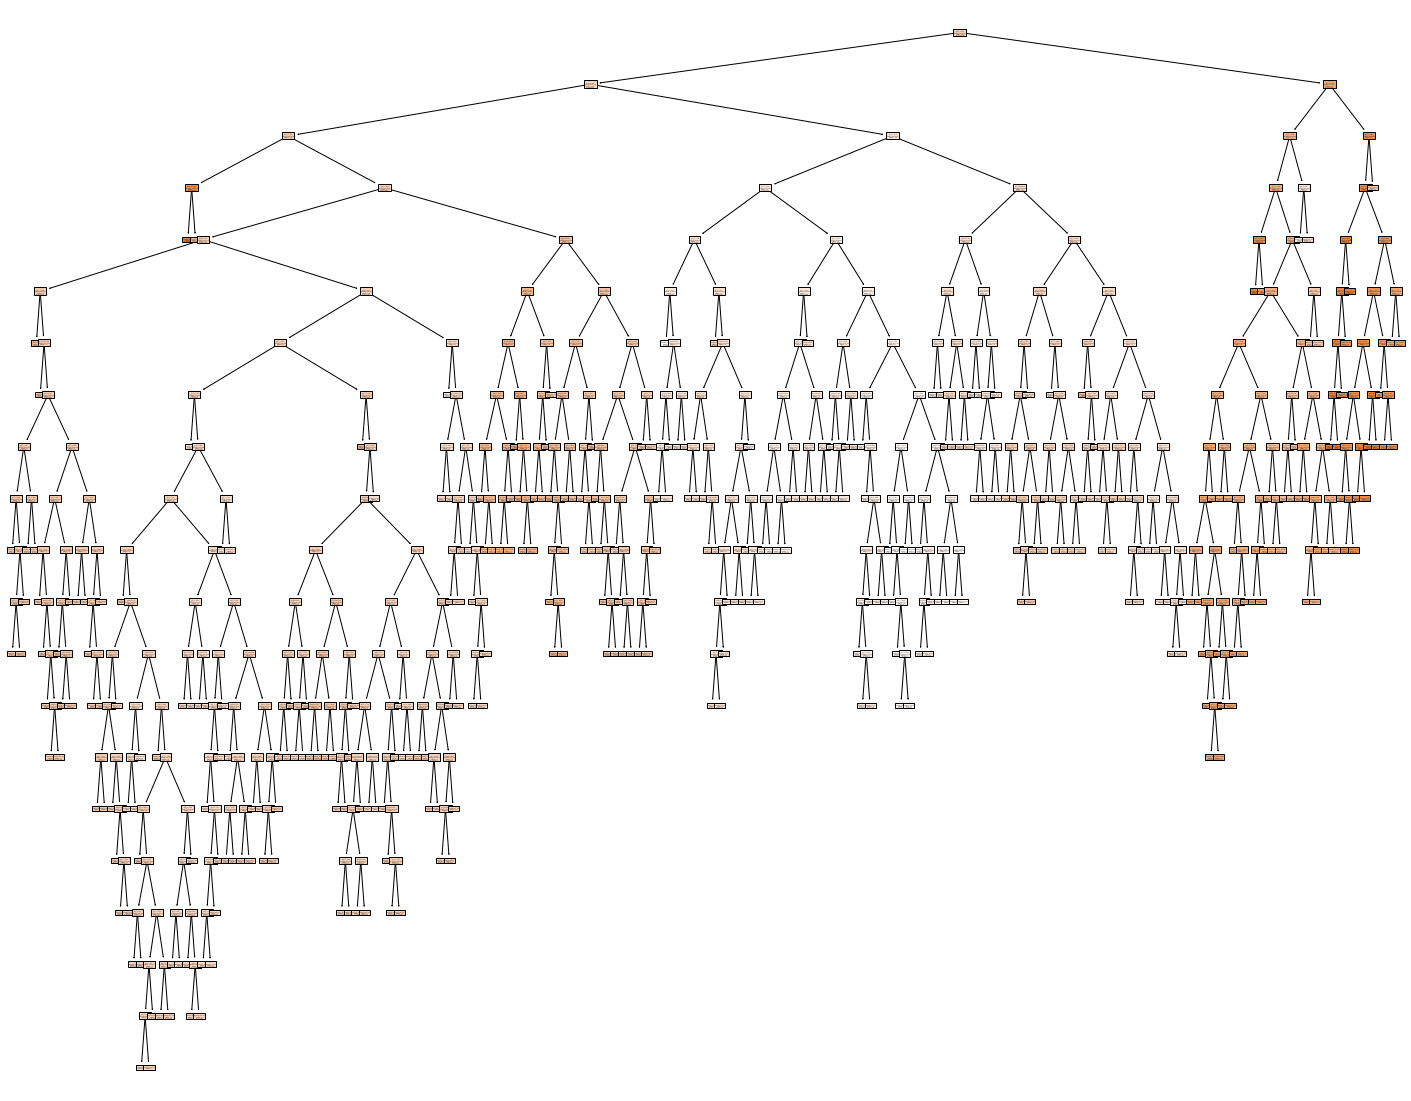

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

In [10]:
model = DecisionTreeRegressor(min_samples_leaf=9, criterion='absolute_error')
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=9)

In [11]:
model.score(X_train, y_train)


0.8193402570873857

In [12]:
model.score(X_test,y_test)


0.8165908760762739

Качество не улучшилось



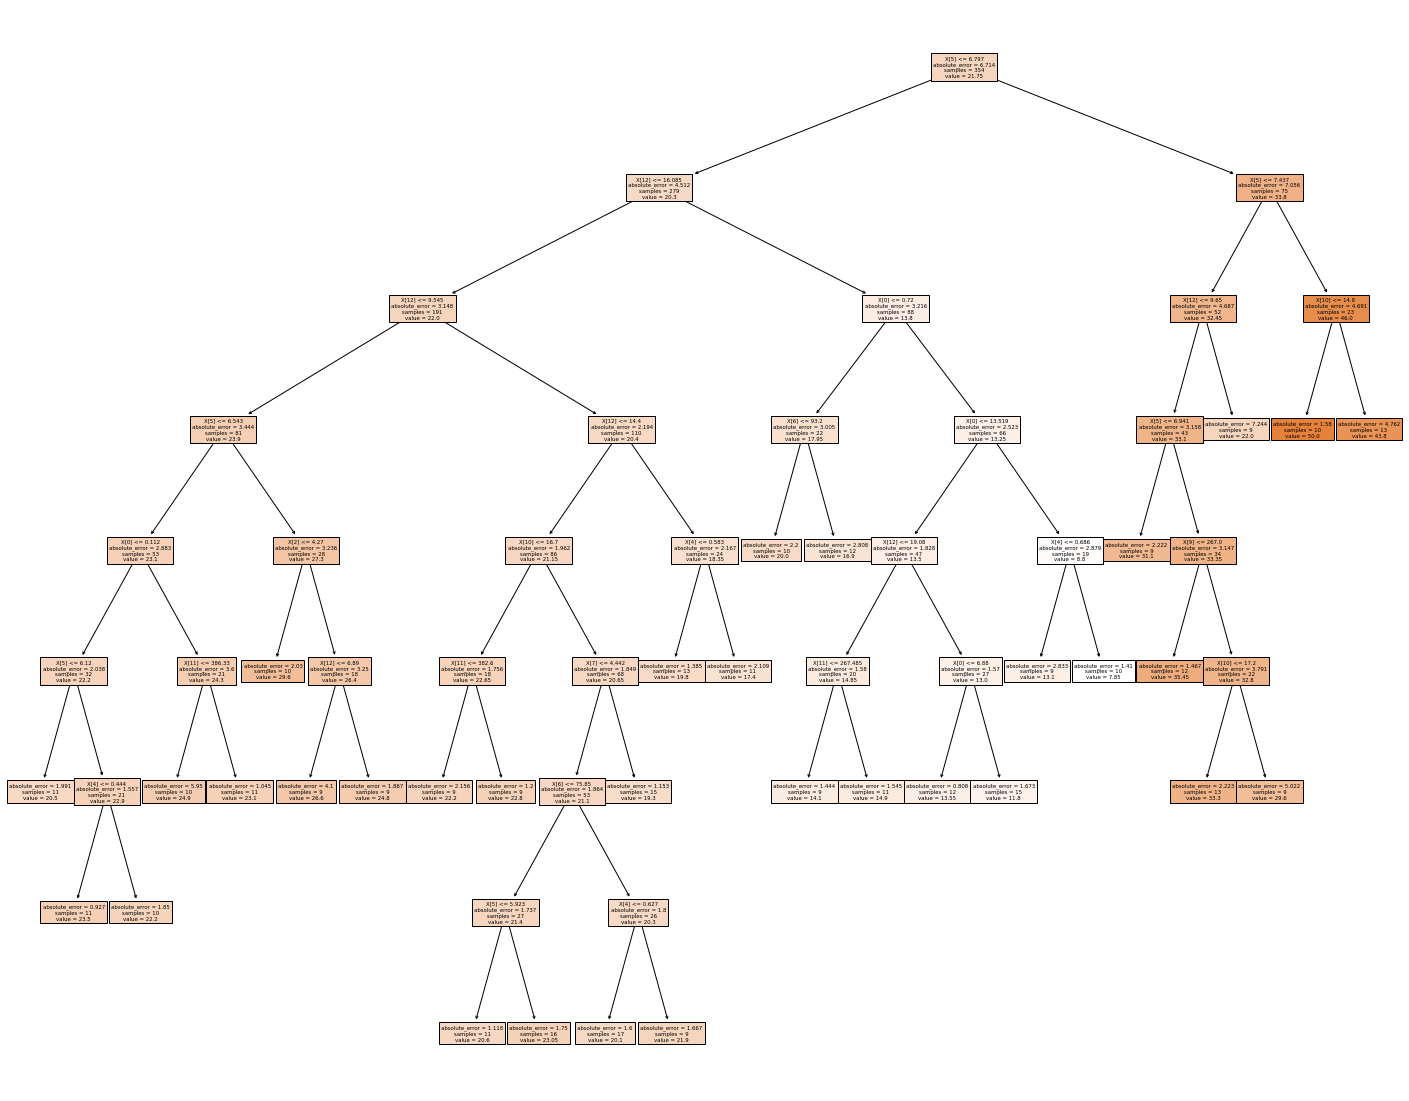

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

Проверим при каком значении max_depth качество лучше. Будем приверять до 20. Здесь довольно сложно выбрать одно значение, т.к. при каждом запуске получаем разные значения качества

In [14]:
scores_on_train = []
scores_on_test = []
for i in range(3, 21):
    dt_regs = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
    scores_on_train.append(dt_regs.score(X_train, y_train))
    scores_on_test.append(dt_regs.score(X_test, y_test))    

In [15]:
deep = 2
for i, j in zip(scores_on_train, scores_on_test):
    deep += 1
    print(f"Deep = {deep}, Train score = {i}, Test score = {j}")

Deep = 3, Train score = 0.8251584424966962, Test score = 0.7728151817263731
Deep = 4, Train score = 0.9018563786810155, Test score = 0.8066292969295191
Deep = 5, Train score = 0.9277198621718044, Test score = 0.8507359013244258
Deep = 6, Train score = 0.9478909478313639, Test score = 0.8589944142025758
Deep = 7, Train score = 0.9688136380520931, Test score = 0.8551290668817472
Deep = 8, Train score = 0.9800398034333819, Test score = 0.8442888395485588
Deep = 9, Train score = 0.9848565262719124, Test score = 0.8660058382187468
Deep = 10, Train score = 0.9886236755280331, Test score = 0.747143822950631
Deep = 11, Train score = 0.9923859690049794, Test score = 0.8647687908038763
Deep = 12, Train score = 0.9955809062171125, Test score = 0.8528411284549269
Deep = 13, Train score = 0.9977698254854958, Test score = 0.849078466710847
Deep = 14, Train score = 0.9989968998627841, Test score = 0.7360109292920731
Deep = 15, Train score = 0.9993903315736662, Test score = 0.7400609965578878
Deep = 1